# Laborotario 02: Scraping y visualización

**Problema:** Leer archivos archivos de diferentes fuentes para extraer los datos que son necesarios para realizar un análisis visual y estadístico. 

**Objetivos de aprendizaje:**
  * Obtener una introducción a las estructuras de datos de `DataFrame` y `Series` de la biblioteca de *Pandas*
  * Acceder y manipular datos dentro de `DataFrame` y `Series`
  * Importar datos CSV a un `DataFrame` de *Pandas*
  * Reindexar un `DataFrame` para obtener datos aleatorios
  * Leer datos desde una página Web

## 1. Introducción rápida a Pandas

 [*pandas*](http://pandas.pydata.org/) es una API de análisis de datos en columnas, ideal para manipular y analizar datos de entrada. Además, muchos marcos de trabajo de AA admiten las estructuras de datos *pandas* como entradas.
Si bien una introducción detallada a la API de *pandas* abarcaría muchas páginas, los conceptos principales que presentamos a continuación son simples. Para obtener una referencia más completa, el [sitio de documentación de *pandas*](http://pandas.pydata.org/pandas-docs/stable/index.html) incluye una documentación exhaustiva y numerosos instructivos.

### 1.1 Conceptos básicos

La siguiente línea importa la API de *pandas* e imprime la versión de la API:

In [48]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.5'

 Las estructuras de datos principales en *pandas* están implementadas en dos clases:

  * **`DataFrame`**, que puedes imaginar como una tabla de datos relacional, con filas y columnas con nombre.
  * **`Series`**, que es una columna simple. Una clase `DataFrame` incluye una o más `Series` y un nombre para cada `Series`.

El marco de datos es una abstracción que se usa normalmente para manipular datos. Hay implementaciones similares en [Spark](https://spark.apache.org/) y [R](https://www.r-project.org/about.

 Una manera de crear una `Series` es construir un objeto de `Series`. Por ejemplo:

In [49]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

 Los objetos de `DataFrame` pueden crearse al enviar un `dict` que asigne nombres de columnas de `string` a sus `Series` correspondientes. Si las `Series` no coinciden con la longitud, los valores que falten se completan con valores [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) especiales. Ejemplo:

In [50]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

# Componer el dataframe a partir de las dos series
pd.DataFrame({ 'Nombre de la ciudad': city_names, 'Población': population })

,Nombre de la ciudad,Población
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


 Pero por lo general, se carga un archivo completo en un `DataFrame`. El siguiente ejemplo carga un archivo con datos de viviendas de California. Ejecuta la siguiente celda para cargar los datos y crear definiciones de funciones:

In [51]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [52]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 En el ejemplo de arriba, se usó `DataFrame.describe` para mostrar estadísticas interesantes sobre un `DataFrame`. Otra función útil es `DataFrame.head`, que muestra los primeros registros de un `DataFrame`:

In [56]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


 Otra función util de *pandas* es la generación de gráficos. Por ejemplo, `DataFrame.hist` permite estudiar rápidamente la distribución de los valores en una columna:

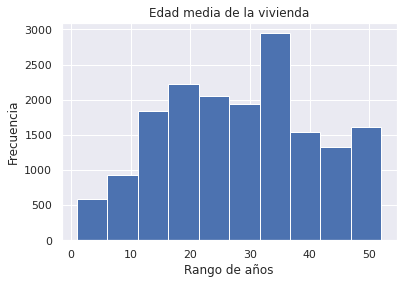

In [61]:
import matplotlib.pyplot as plt

california_housing_dataframe.hist('housing_median_age')
plt.title('Edad media de la vivienda')
plt.xlabel('Rango de años')
plt.ylabel('Frecuencia')
plt.grid(True)

 ## Acceso a los datos

Puedes acceder a los datos de `DataFrame` mediante las operaciones convencionales de dict/list de Python:

In [67]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
#print(type(cities['City name']))

cities.head()

cities['City name']

0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [66]:
#print(type(cities['City name'][1]))
cities['City name'][1]

'San Jose'

In [68]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


 Además, *pandas* proporciona una API muy enriquecida para una [indexación y selección](http://pandas.pydata.org/pandas-docs/stable/indexing.html) avanzadas, que es un tema demasiado amplio como para cubrirlo aquí.

 ## Manipulación de datos

Puedes aplicar operaciones aritméticas básicas de Python a las `Series`. Por ejemplo:

In [69]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

 [NumPy](http://www.numpy.org/) es un kit de herramientas popular para el cálculo científico. Las `Series` de *pandas* pueden usarse como argumentos para la mayoría de las funciones NumPy:

In [70]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

 Para obtener información sobre transformaciones más complejas de una sola columna, puedes usar `Series.apply`. Al igual que la función [función map](https://docs.python.org/2/library/functions.html#map) de Python, `Series.apply` acepta como argumento una función [función lambda](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), que se aplica a cada valor.

El siguiente ejemplo crea una nueva `Series` que indica si la `population` es superior a un millón:

In [71]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

 
Modificar `DataFrames` también es simple. Por ejemplo, el siguiente código agrega dos `Series` a un `DataFrame` existente:

In [72]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


 ## Ejercicio n.º 1

Para modificar la tabla de `cities`, agregar una nueva columna booleana que sea Verdadera si y solo si *ambos* de los siguientes valores son Verdaderos:

  * La ciudad le debe su nombre a un santo.
  * La ciudad tiene un área superior a 50 millas cuadradas.

**Nota:** Las `Series` booleanas se combinan en función de los bits, en lugar de los operadores booleanos tradicionales. Por ejemplo, cuando utilices *logical and*, usa `&` en lugar de `and`.

**Hint:** "San" en español representa "santo".

In [ ]:
# Your code here

 ### Solución

Haz clic a continuación para obtener una solución.

In [ ]:
#@title
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

 ## Índices
Los objetos `Series` y `DataFrame` también definen una propiedad de `index` que asigna un valor de identificador a cada elemento `Series` o fila `DataFrame`.

De forma predeterminada, en la construcción, *pandas* asigna valores de índice que reflejan la solicitud de los datos de origen. Una vez creados, los valores de índice son estables, es decir, no cambian cuando cambia el orden de los datos.

In [73]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [74]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [75]:
cities.head()

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


 Llama `DataFrame.reindex` para cambiar el orden de las filas de forma manual. Por ejemplo, la siguiente acción tiene el mismo efecto que ordenar los valores por nombre de ciudad:

In [76]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density
2,Sacramento,485199,97.92,4955.055147
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760


 La reindexación es una excelente manera de seleccionar un `DataFrame` de forma aleatoria. En el ejemplo que se muestra a continuación, tomamos el índice, que es del tipo matriz, y lo enviamos a la función `random.permutation` de NumPy, que selecciona sus valores de forma aleatoria. Utilizar la `reindexación` con esta matriz aleatoria provoca que las filas de `DataFrame` se seleccionen de forma aleatoria de la misma manera.
¡Prueba ejecutar la siguiente celda varias veces!

In [80]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
2,Sacramento,485199,97.92,4955.055147
1,San Jose,1015785,176.53,5754.177760


 Para obtener más información, consulta [Documentación de índice](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

 ## Ejercicio n.º 2

El método de `reindex` permite los valores de índice que no están en los valores de índice originales de `DataFrame`. Pruébalo y observa lo que sucede si usas esos valores. ¿Por qué supones que los permite?

In [ ]:
# Your code here

 ### Solución

Haz clic a continuación para conocer la solución.

 Si la matriz de la entrada `reindex` incluye valores que no se encuentran en los valores de índice originales `DataFrame`, `reindex` agregará nuevas filas para esos índices "faltantes" y completará todas las columnas correspondientes con los valores `NaN`:

In [ ]:
#@title
cities.reindex([0, 4, 5, 2])

 Este comportamiento es util, ya que por lo general los índices son strings extraídos de los datos actuales (consulta la [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) para obtener un ejemplo en el que los valores de índice son nombres de navegadores).

En este caso, permitir los índices "faltantes" facilita la reindexación mediante una lista externa, dado que no tienes que preocuparte por sanear directamente las entradas.

## 2. Obtener datos desde una página HTML

1. Obtener los datos de una página web (http://www.sismologia.cl/links/tabla.html), extraer la información relevante y convertirla a un DataFrame.
2. Crear una columna llamada 'magnitud_int' y guardar los valores enteros como tipo de dato float.
3. Imprimir la magnitud máxima.
4. Imprimir la magnitud mínima.
5. Imprimir la magnitud promedio.
6. Imprimir toda la fila del dataFrame donde se encuentra la magnitud máxima.
7. Repetir el ejercicio 3, 4, 5 y 6 solo considerando las magnitudes 'Ml'
8. Separar la fecha de la hora.

Muestre los resultados formateando la salida.

In [83]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np

response = requests.get('http://www.sismologia.cl/links/tabla.html')

#print(response.content)

soup = BeautifulSoup(response.content)
table = soup.find("table")

print(table)

<table>
<tbody>
<tr class="impar"><th>Fecha Local</th><th>Lugar</th><th>Magnitud</th></tr>
<tr class="par"><td><a href="/events/sensibles/2021/05/06-1218-03L.S202105.html" target="centro">2021/05/06 08:18:04</a></td><td>34 km al O de Ollagüe</td><td>4.2 Ml</td></tr>
<tr class="impar"><td><a href="/events/sensibles/2021/05/06-1052-10L.S202105.html" target="centro">2021/05/06 06:52:13</a></td><td>10 km al N de Ovalle</td><td>3.1 Ml</td></tr>
<tr class="par"><td><a href="/events/sensibles/2021/05/06-0913-00L.S202105.html" target="centro">2021/05/06 05:13:22</a></td><td>55 km al N de Camiña</td><td>3.1 Ml</td></tr>
<tr class="impar"><td><a href="/events/sensibles/2021/05/06-0823-20L.S202105.html" target="centro">2021/05/06 04:23:18</a></td><td>36 km al SO de Huasco</td><td>3.8 Ml</td></tr>
<tr class="par s_sensible"><td><a href="/events/sensibles/2021/05/06-0602-01L.S202105.html" target="centro">2021/05/06 02:01:59</a></td><td>18 km al SO de Andacollo</td><td>3.0 Ml</td></tr>
<tr class="im

In [84]:
#print(table)
#print(table.find('tr'))
print(table.find_all('tr'))

for s in table.find_all('tr'):
  print('Fila -->', s)

[<tr class="impar"><th>Fecha Local</th><th>Lugar</th><th>Magnitud</th></tr>, <tr class="par"><td><a href="/events/sensibles/2021/05/06-1218-03L.S202105.html" target="centro">2021/05/06 08:18:04</a></td><td>34 km al O de Ollagüe</td><td>4.2 Ml</td></tr>, <tr class="impar"><td><a href="/events/sensibles/2021/05/06-1052-10L.S202105.html" target="centro">2021/05/06 06:52:13</a></td><td>10 km al N de Ovalle</td><td>3.1 Ml</td></tr>, <tr class="par"><td><a href="/events/sensibles/2021/05/06-0913-00L.S202105.html" target="centro">2021/05/06 05:13:22</a></td><td>55 km al N de Camiña</td><td>3.1 Ml</td></tr>, <tr class="impar"><td><a href="/events/sensibles/2021/05/06-0823-20L.S202105.html" target="centro">2021/05/06 04:23:18</a></td><td>36 km al SO de Huasco</td><td>3.8 Ml</td></tr>, <tr class="par s_sensible"><td><a href="/events/sensibles/2021/05/06-0602-01L.S202105.html" target="centro">2021/05/06 02:01:59</a></td><td>18 km al SO de Andacollo</td><td>3.0 Ml</td></tr>, <tr class="impar"><td>

In [85]:
# Obtengo la primera linea y obtengo los títulos de cada columna
cabecera_tabla = [th.get_text() for th in table.find("tr").find_all("th")]
print(cabecera_tabla)

['Fecha Local', 'Lugar', 'Magnitud']


In [86]:
# Obtengo los datos fila por fila
datasets = []
for row in table.find_all("tr")[1:]:
    dataset = [td.get_text() for td in row.find_all("td")]
    datasets.append(dataset)

for row in datasets:
  print(row)

['2021/05/06 08:18:04', '34 km al O de Ollagüe', '4.2 Ml']
['2021/05/06 06:52:13', '10 km al N de Ovalle', '3.1 Ml']
['2021/05/06 05:13:22', '55 km al N de Camiña', '3.1 Ml']
['2021/05/06 04:23:18', '36 km al SO de Huasco', '3.8 Ml']
['2021/05/06 02:01:59', '18 km al SO de Andacollo', '3.0 Ml']
['2021/05/05 23:47:12', '103 km al NE de Taltal', '3.2 Ml']
['2021/05/05 21:22:51', '51 km al NE de Calama', '4.0 Ml']
['2021/05/05 07:43:22', '165 km al SO de El Tabo', '3.1 Ml']
['2021/05/05 07:23:15', '51 km al NO de Diego de Almagro', '3.1 Ml']
['2021/05/05 07:15:00', '46 km al SO de Mina Collahuasi', '3.2 Ml']
['2021/05/05 06:09:36', '80 km al SE de Socaire', '3.4 Ml']
['2021/05/05 03:48:53', '12 km al NO de Ancud', '3.1 Ml']
['2021/05/05 03:44:27', '93 km al S de Navidad', '3.2 Ml']
['2021/05/05 02:56:58', '44 km al SO de Mina Collahuasi', '3.4 Ml']
['2021/05/05 02:41:15', '10 km al NE de Ancud', '3.3 Ml']


In [87]:
# Convierto dataFrame (Pandas)
dic = {'Fecha Local':[], 'Lugar':[], 'Magnitud':[]}
for row in table.find_all("tr")[1:]:
    data_row = row.find_all('td')
    dic['Fecha Local'].append(data_row[0].get_text())
    dic['Lugar'].append(data_row[1].get_text())
    dic['Magnitud'].append(data_row[2].get_text())
print(dic)

{'Fecha Local': ['2021/05/06 08:18:04', '2021/05/06 06:52:13', '2021/05/06 05:13:22', '2021/05/06 04:23:18', '2021/05/06 02:01:59', '2021/05/05 23:47:12', '2021/05/05 21:22:51', '2021/05/05 07:43:22', '2021/05/05 07:23:15', '2021/05/05 07:15:00', '2021/05/05 06:09:36', '2021/05/05 03:48:53', '2021/05/05 03:44:27', '2021/05/05 02:56:58', '2021/05/05 02:41:15'], 'Lugar': ['34 km al O de Ollagüe', '10 km al N de Ovalle', '55 km al N de Camiña', '36 km al SO de Huasco', '18 km al SO de Andacollo', '103 km al NE de Taltal', '51 km al NE de Calama', '165 km al SO de El Tabo', '51 km al NO de Diego de Almagro', '46 km al SO de Mina Collahuasi', '80 km al SE de Socaire', '12 km al NO de Ancud', '93 km al S de Navidad', '44 km al SO de Mina Collahuasi', '10 km al NE de Ancud'], 'Magnitud': ['4.2 Ml', '3.1 Ml', '3.1 Ml', '3.8 Ml', '3.0 Ml', '3.2 Ml', '4.0 Ml', '3.1 Ml', '3.1 Ml', '3.2 Ml', '3.4 Ml', '3.1 Ml', '3.2 Ml', '3.4 Ml', '3.3 Ml']}


In [89]:
# Crear dataFrame de un diccionario
df = pd.DataFrame(dic)

df.head(10)

,Fecha Local,Lugar,Magnitud
0,2021/05/06 08:18:04,34 km al O de Ollagüe,4.2 Ml
1,2021/05/06 06:52:13,10 km al N de Ovalle,3.1 Ml
2,2021/05/06 05:13:22,55 km al N de Camiña,3.1 Ml
3,2021/05/06 04:23:18,36 km al SO de Huasco,3.8 Ml
4,2021/05/06 02:01:59,18 km al SO de Andacollo,3.0 Ml
5,2021/05/05 23:47:12,103 km al NE de Taltal,3.2 Ml
6,2021/05/05 21:22:51,51 km al NE de Calama,4.0 Ml
7,2021/05/05 07:43:22,165 km al SO de El Tabo,3.1 Ml
8,2021/05/05 07:23:15,51 km al NO de Diego de Almagro,3.1 Ml
9,2021/05/05 07:15:00,46 km al SO de Mina Collahuasi,3.2 Ml


In [90]:
print(df['Magnitud'])

0     4.2 Ml
1     3.1 Ml
2     3.1 Ml
3     3.8 Ml
4     3.0 Ml
5     3.2 Ml
6     4.0 Ml
7     3.1 Ml
8     3.1 Ml
9     3.2 Ml
10    3.4 Ml
11    3.1 Ml
12    3.2 Ml
13    3.4 Ml
14    3.3 Ml
Name: Magnitud, dtype: object


In [91]:
# Operacion sobre columnas
df['Magnitud_entera'] = df['Magnitud'].map(lambda magnitud: float(magnitud[:3]))
df['Fecha'] = df['Fecha Local'].map(lambda f: f[:11])
df.head()


,Fecha Local,Lugar,Magnitud,Magnitud_entera,Fecha
0,2021/05/06 08:18:04,34 km al O de Ollagüe,4.2 Ml,4.2,2021/05/06
1,2021/05/06 06:52:13,10 km al N de Ovalle,3.1 Ml,3.1,2021/05/06
2,2021/05/06 05:13:22,55 km al N de Camiña,3.1 Ml,3.1,2021/05/06
3,2021/05/06 04:23:18,36 km al SO de Huasco,3.8 Ml,3.8,2021/05/06
4,2021/05/06 02:01:59,18 km al SO de Andacollo,3.0 Ml,3.0,2021/05/06


In [93]:
print('Magnitud máxima', np.max(df['Magnitud_entera']))
print('Magnitud mínimo', np.min(df['Magnitud_entera']))
print('Magnitud promedio', np.mean(df['Magnitud_entera']))

# Quiero recuperar la fila con magnitud más alta
#print(df['Magnitud_entera'] == 3.0)
#print(df[df['Magnitud_entera'] == 3.0])

print(df[df['Magnitud_entera'] == np.max(df['Magnitud_entera'])])

print(df[df['Magnitud_entera'] == np.min(df['Magnitud_entera'])])

Magnitud máxima 4.2
Magnitud mínimo 3.0
Magnitud promedio 3.3466666666666667
           Fecha Local                  Lugar  ... Magnitud_entera        Fecha
0  2021/05/06 08:18:04  34 km al O de Ollagüe  ...             4.2  2021/05/06 

[1 rows x 5 columns]
           Fecha Local                     Lugar  ... Magnitud_entera        Fecha
4  2021/05/06 02:01:59  18 km al SO de Andacollo  ...             3.0  2021/05/06 

[1 rows x 5 columns]


## Obtener datos de un servidor implementado con API Rest.

1. Obtener el valor del dólar del todo el año 2019 utilizando la API Rest: https://mindicador.cl/.

In [97]:
import requests
import json

response = requests.get('https://mindicador.cl/api/dolar/2021')

print(response.content)

data = json.loads(response.content)
print(data)

# Acceso a JSON como si fuera un diccionario
print(data['nombre'])

# Valor del dolar de todo el 2019 a la fecha
#for valor_dolar in data['serie']:
#  print(valor_dolar['valor'])
  
# DataFrame
df = pd.DataFrame(data['serie'])
df.head()

b'{"version":"1.6.0","autor":"mindicador.cl","codigo":"dolar","nombre":"D\xc3\xb3lar observado","unidad_medida":"Pesos","serie":[{"fecha":"2021-05-06T04:00:00.000Z","valor":703.09},{"fecha":"2021-05-05T04:00:00.000Z","valor":705.25},{"fecha":"2021-05-04T04:00:00.000Z","valor":706.29},{"fecha":"2021-05-03T04:00:00.000Z","valor":711.06},{"fecha":"2021-04-30T04:00:00.000Z","valor":705.09},{"fecha":"2021-04-29T04:00:00.000Z","valor":700.15},{"fecha":"2021-04-28T04:00:00.000Z","valor":702.02},{"fecha":"2021-04-27T04:00:00.000Z","valor":707.05},{"fecha":"2021-04-26T04:00:00.000Z","valor":712.54},{"fecha":"2021-04-23T04:00:00.000Z","valor":705.41},{"fecha":"2021-04-22T04:00:00.000Z","valor":696.8},{"fecha":"2021-04-21T04:00:00.000Z","valor":697.19},{"fecha":"2021-04-20T04:00:00.000Z","valor":700.96},{"fecha":"2021-04-19T04:00:00.000Z","valor":701.55},{"fecha":"2021-04-16T04:00:00.000Z","valor":701.98},{"fecha":"2021-04-15T04:00:00.000Z","valor":707.25},{"fecha":"2021-04-14T04:00:00.000Z","val

,fecha,valor
0,2021-05-06T04:00:00.000Z,703.09
1,2021-05-05T04:00:00.000Z,705.25
2,2021-05-04T04:00:00.000Z,706.29
3,2021-05-03T04:00:00.000Z,711.06
4,2021-04-30T04:00:00.000Z,705.09


2. Graficar la variación del dólar para todo el año 2019.

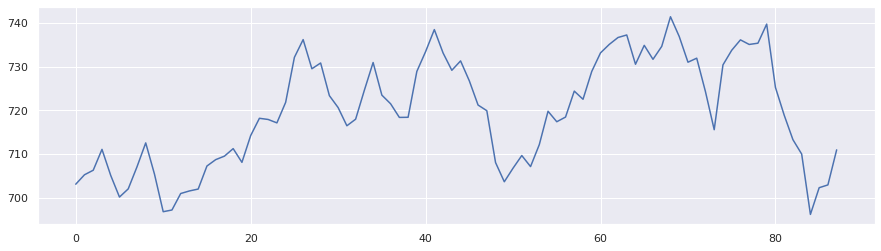

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.plot(df['valor'])

3. Convertir un string en formato ISO-8601  a un objeto date


In [99]:
import dateutil.parser
yourdate = dateutil.parser.parse(df['fecha'][0])

print('Imprimir el mes', yourdate.month)


Imprimir el mes 5


# Grafos

In [100]:
# import the libraries & dataset
import pandas as pd 
data = pd.read_excel('/content/dataset_airline_optimization_problem.xlsx') 
data.head()

,Unnamed: 0,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05


Dibujemos el grafo

{1: 19.307692307692307, 2: 19.0625, 3: 19.0, 17: 2.0588235294117645, 20: 1.95}

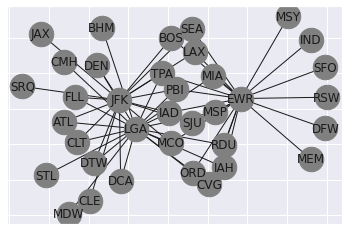

In [101]:
import networkx as nx

FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)
FG.nodes()
FG.edges()
nx.draw_networkx(FG, with_labels=True,node_size=600, node_color='gray') 
nx.algorithms.degree_centrality(FG) 
nx.density(FG) 
nx.average_shortest_path_length(FG)
nx.average_degree_connectivity(FG) 

Calcular los caminos más cortos

In [102]:
# Let us find the dijkstra path from JAX to DFW.
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
print('Dijkstra path: ', dijpath)

# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
print('dijkstra path weighted by airtime:', shortpath)

Dijkstra path:  ['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
dijkstra path weighted by airtime: ['JAX', 'JFK', 'BOS', 'EWR', 'DFW']
